# 뉴스기사 요약해보기

## library import

In [1]:
import nltk
nltk.download('stopwords') # 불용어

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aiffel0042/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 데이터 수집
- 데이터는 아래 링크에 있는 뉴스 기사 데이터(newssummarymore.csv)를 사용하세요.
- sunnysai12345/News_Summary



In [2]:

import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')


In [3]:
data.sample(10)

,headlines,text
7899,J&K records 76.9% turnout in 6th phase of panc...,Jammu and Kashmir on Saturday recorded a total...
94895,Uber admits it found one Waymo document on emp...,Uber has admitted that it found one of the doc...
27916,India reach second spot in ICC T20I team rankings,Following their thrashing of Ireland in the tw...
24595,"Flipkart to shut eBay India, open new refurbis...","Flipkart, which acquired eBay India last year,..."
83640,ED attaches assets worth Ã¢ÂÂ¹55 crore in Noi...,Enforcement Directorate (ED) on Friday attache...
19126,Feel deliberately sidelined by mainstream dire...,Actor Ranvir Shorey has said that he feels he ...
40334,I have been a nicotine addict since the age of...,Actor Ranbir Kapoor has revealed that he has b...
33134,Pak hands over Indian who mistakenly crossed b...,"A 23-year-old Indian man, who had mistakenly e..."
29755,WhatsApp msg about Jet Airways giving 2 free t...,A fake message about Jet Airways giving away t...
78278,Government panel to consider Air India debt wr...,The Aviation Ministry and the Department of In...


## data pre-processing

### 중복 제거

In [4]:
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [5]:
data.drop_duplicates(subset = ['text'], inplace = True) # 중복제거
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 98360


### 널값 제거

In [6]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [7]:
 # 없음..
# null 값 제거
data.dropna(axis = 0, inplace = True)
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 98360


### 텍스트 정규화

In [12]:
### 텍스트 정규화...

contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ",len(contractions))

정규화 사전의 수:  120


### 불용어 

In [13]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

### 전처리 함수(소문자, 태그제거, 특수문자 제거, 중복문자, 불용어, 정규화)

In [14]:
#데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

### 전처리 실행

In [ ]:
#text

clean_text = []


for s in data['text']:
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
clean_text[:5]

In [ ]:
# headline
# 불용어 전처리 하지 않음...

clean_headline = []


for s in data['headlines']:
    clean_headline.append(preprocess_sentence(s, False))

clean_headline[:5]

In [ ]:
### 널값 다시 체크
data.isnull().sum()

## 널값 업넹..
# data.dropna(axis=0, inplace=True)
# print('전체 샘플수 :',(len(data)))#데이터 전처리 함수

### data 최대 길이 지정 및 잘라내기

In [ ]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
summary_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('g헤드라인의 최소 길이 : {}'.format(np.min(summary_len)))
print('헤드라인의 최대 길이 : {}'.format(np.max(summary_len)))
print('헤드라인의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('Summary')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('headline')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
## 최대 길이 지정.

text_max_len = 65
summary_max_len = 12

In [ ]:
## 최대길이로 잘랏을때 비중. 계산해보기.

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [ ]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(summary_max_len,  data['headlines'])

In [ ]:
### 잘라내기


In [ ]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :',(len(data)))

### 시작 끝 토큰 추가하기

In [ ]:
#요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

In [ ]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

### data set 분리

In [ ]:
# 랜덤 서플 ...
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

In [ ]:
#섞어
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [ ]:
# 8:2로 분리

n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :',n_of_val)

In [ ]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

### 정수인코딩

In [ ]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [30]:
## 등장 획수가 7회 미만인 단어들의 비중

threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 90531
등장 빈도가 6번 이하인 희귀 단어의 수: 65959
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 24572
단어 집합에서 희귀 단어의 비율: 72.85791607294739
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.7739412189686457


In [32]:
## 토크나이저 재정의

In [31]:
src_vocab = 25000
src_tokenizer = Tokenizer(num_words = src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성.

In [33]:
## 전환

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

#잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[676, 4522, 984, 4331, 1741, 2444, 2725, 587, 1104, 11719, 8, 10, 132, 13, 100, 403, 9, 2813, 16, 7121, 865, 190, 2, 35, 16020, 2, 649, 1, 1086, 89, 180, 2042, 143, 676, 1506, 6, 865, 26, 30, 9915, 176, 3147, 8023, 7032, 16, 351, 699, 5394, 2, 25, 1, 117, 2629, 627, 4, 1, 746, 89], [447, 299, 58, 1676, 2394, 1136, 8, 10, 11, 21, 13, 1538, 2, 1411, 7, 1052, 190, 2, 423, 2, 423, 12021, 1, 52, 83, 181, 427, 747, 1, 1323, 13, 347, 20, 21, 8, 1666, 4, 340, 1136, 33, 225, 826, 4023, 373, 9556, 423, 2, 423, 12021, 115, 1329, 1, 17366, 6, 16021, 2, 2307, 1, 1490, 6738], [1, 2359, 212, 5, 40, 884, 7, 120, 10, 21, 78, 20079, 10105, 67, 57, 11207, 92, 1, 365, 218, 2490, 5, 52, 9087, 4, 674, 490, 5245, 5, 3, 1833, 1459, 8940, 1, 456, 2529, 481, 121, 18, 1, 52, 163, 7, 122, 11, 21, 23, 818, 3697, 20080, 15, 6381, 67, 57, 4, 1, 172, 723, 5, 1, 786, 1749]]


In [34]:
## headline은

In [35]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [36]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 40448
등장 빈도가 5번 이하인 희귀 단어의 수: 29269
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 11179
단어 집합에서 희귀 단어의 비율: 72.36204509493672
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.316033296789654


In [37]:
tar_vocab = 11000
tar_tokenizer = Tokenizer(num_words = tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

#잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 277, 1105, 3, 1106, 1542, 57, 250, 1143], [1, 2026, 3, 1266, 1752, 7, 434, 988, 24], [1, 390, 3, 8680, 50, 31, 97, 676, 4, 2278], [1, 4123, 6, 3800, 10204, 6, 647, 721, 5615], [1, 4266, 1411, 443, 572, 3115, 4124, 3589, 3, 200, 111, 624, 384]]
target
decoder  [[277, 1105, 3, 1106, 1542, 57, 250, 1143, 2], [2026, 3, 1266, 1752, 7, 434, 988, 24, 2], [390, 3, 8680, 50, 31, 97, 676, 4, 2278, 2], [4123, 6, 3800, 10204, 6, 647, 721, 5615, 2], [4266, 1411, 443, 572, 3115, 4124, 3589, 3, 200, 111, 624, 384, 2]]


In [38]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :',len(drop_train))
print('삭제할 테스트 데이터의 개수 :',len(drop_test))

encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 76863
훈련 레이블의 개수 : 76863
테스트 데이터의 개수 : 19215
테스트 레이블의 개수 : 19215


### 패딩

In [39]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen = text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen = summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen = summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = summary_max_len, padding='post')

## 모델

In [40]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [41]:
# 디코더 설계

decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [42]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 65)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 65, 128)      3200000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 65, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

## 어텐션 매커니즘

In [44]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [45]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 65)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 65, 128)      3200000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 65, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

## 모델 훈련

In [46]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 256, callbacks=[es], epochs = 50)

Epoch 1/50
301/301 [==============================] - 131s 435ms/step - loss: 5.8828 - val_loss: 5.4755
Epoch 2/50
301/301 [==============================] - 129s 430ms/step - loss: 5.3031 - val_loss: 5.0685
Epoch 3/50
301/301 [==============================] - 130s 432ms/step - loss: 4.9263 - val_loss: 4.7771
Epoch 4/50
301/301 [==============================] - 130s 432ms/step - loss: 4.6554 - val_loss: 4.5805
Epoch 5/50
301/301 [==============================] - 130s 433ms/step - loss: 4.4345 - val_loss: 4.4273
Epoch 6/50
301/301 [==============================] - 130s 433ms/step - loss: 4.2508 - val_loss: 4.3020
Epoch 7/50
301/301 [==============================] - 130s 431ms/step - loss: 4.0938 - val_loss: 4.1944
Epoch 8/50
301/301 [==============================] - 130s 433ms/step - loss: 3.9572 - val_loss: 4.1101
Epoch 9/50
301/301 [==============================] - 131s 434ms/step - loss: 3.8368 - val_loss: 4.0352
Epoch 10/50
301/301 [==============================] - 130s 431m

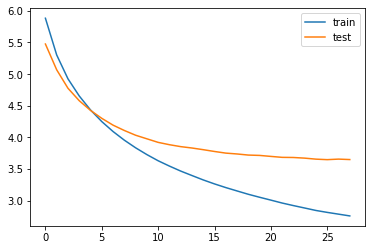

In [47]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 인퍼런스 모델 구현

In [54]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음ㅊ

In [55]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [56]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [57]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if(sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

## model test - 실제결과  요약문 비교

In [58]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if(i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [59]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : a man in rajasthan's udaipur blew himself up with dynamite on sunday using a after his wife left him following an argument five days ago according to reports we have sent the body for post mortem we are investigating the matter police officials said police suspect that the victim who worked at a mine arranged the dynamite from his workplace 
실제 요약 : man blows himself up with after wife leaves him 
예측 요약 :  man kills wife for wife in front of his wife


원문 : the national green tribunal on friday directed the central pollution control board cpcb to collect samples of alleged poop falling from the sky and determine whether they are human or bird excreta this comes after a retired army official alleged that planes were dumping faeces in his neighbourhood near delhi airport notably airlines face fines for dumping human waste mid air 
실제 요약 : asked to check if poop falling from sky is human 
예측 요약 :  ngt orders of cameras to avoid food


원문 : russia may restrict the operations of us med

예측 요약 :  netflix takes dig at pm modi's residence in mp


원문 : from indonesia who claimed to be 146 years old died in a hospital recently according to documents he was born in december however he was not recognised as the longest living human being as indonesia started recording births only in 1900 all ten of his siblings his four wives and his children as per reports 
실제 요약 : man who claimed to be years old dies 
예측 요약 :  indonesian family dies after being dies aged 85


원문 : after the congress jd s alliance sought to stop the swearing in ceremony of bjp's bs yeddyurappa as karnataka's chief minister the supreme court agreed to hear the petition at 1 45 am this comes after karnataka governor vajubhai vala invited the bjp which emerged as the single largest party to form the government yeddyurappa was given 15 days to prove the bjp's majority 
실제 요약 : hear cong jd s petition on k'taka polls at 1 45 am 
예측 요약 :  bjp to karnataka cm to k'taka cm for k'taka polls


원문 : irish airline ryan

예측 요약 :  gay couple sex with sex with women in uk


원문 : actress neha dhupia has said that some people upon her for wearing loose clothes and gaining weight before she announced her pregnancy she added for me it doesnã¢âât matter what other people think of you as long as you are healthy neha who's expecting her first child with husband angad bedi announced her pregnancy three months after marriage n 
실제 요약 : i was for weight gain loose clothes neha 
예측 요약 :  i am not wearing pregnancy neha on pregnancy row


원문 : russian president vladimir putin has invited north korean leader kim jong un to attend the eastern economic forum in russia in september putin extended the invitation as kim yong nam the head of the of north korea's supreme people's assembly met the russian president earlier this week russian foreign minister sergei lavrov had met kim jong un in north korea last month 
실제 요약 : putin invites north korea's kim jong un to russia 
예측 요약 :  putin kim jong un meet to meet n korea 

## Summa을 이용해서 추출적 요약해보기

In [60]:
import requests
from summa.summarizer import summarize

In [61]:
#text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text


In [68]:


for i in range(50, 60):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("summarize 요약 :",summarize(seq2text(encoder_input_test[i]), ratio=0.005))

원문 : a man in rajasthan's udaipur blew himself up with dynamite on sunday using a after his wife left him following an argument five days ago according to reports we have sent the body for post mortem we are investigating the matter police officials said police suspect that the victim who worked at a mine arranged the dynamite from his workplace 
실제 요약 : man blows himself up with after wife leaves him 
summarize 요약 : 
원문 : the national green tribunal on friday directed the central pollution control board cpcb to collect samples of alleged poop falling from the sky and determine whether they are human or bird excreta this comes after a retired army official alleged that planes were dumping faeces in his neighbourhood near delhi airport notably airlines face fines for dumping human waste mid air 
실제 요약 : asked to check if poop falling from sky is human 
summarize 요약 : 
원문 : russia may restrict the operations of us media organisations in the country the foreign ministry said on sunday we 

In [66]:
encoder_input_test

array([[  53,  140,  477, ...,    0,    0,    0],
       [2067,    5,   29, ...,    0,    0,    0],
       [  95,  157, 1190, ...,    0,    0,    0],
       ...,
       [ 114, 1927, 4228, ...,    0,    0,    0],
       [7680,    8, 1657, ...,    0,    0,    0],
       [1525,  393, 1295, ...,    0,    0,    0]], dtype=int32)